 # This portion of the code loads the data

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import random
from tqdm import tqdm


!git clone https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 25.91 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [3]:
DATA_DIR = 'CIFAR-10-images/test'
IMG_SIZE = 32
CATEGORIES = [i for i in os.listdir(DATA_DIR)]
print("Types of images from the dataset: ")
print(CATEGORIES)

Types of images from the dataset: 
['horse', 'ship', 'frog', 'cat', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane']


In [4]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            training_data.append([img_gray, class_num])
        except:
            pass

print(len(training_data))

100%|██████████| 1000/1000 [00:00<00:00, 9154.21it/s]

10000


# Plotting the images in greyscale

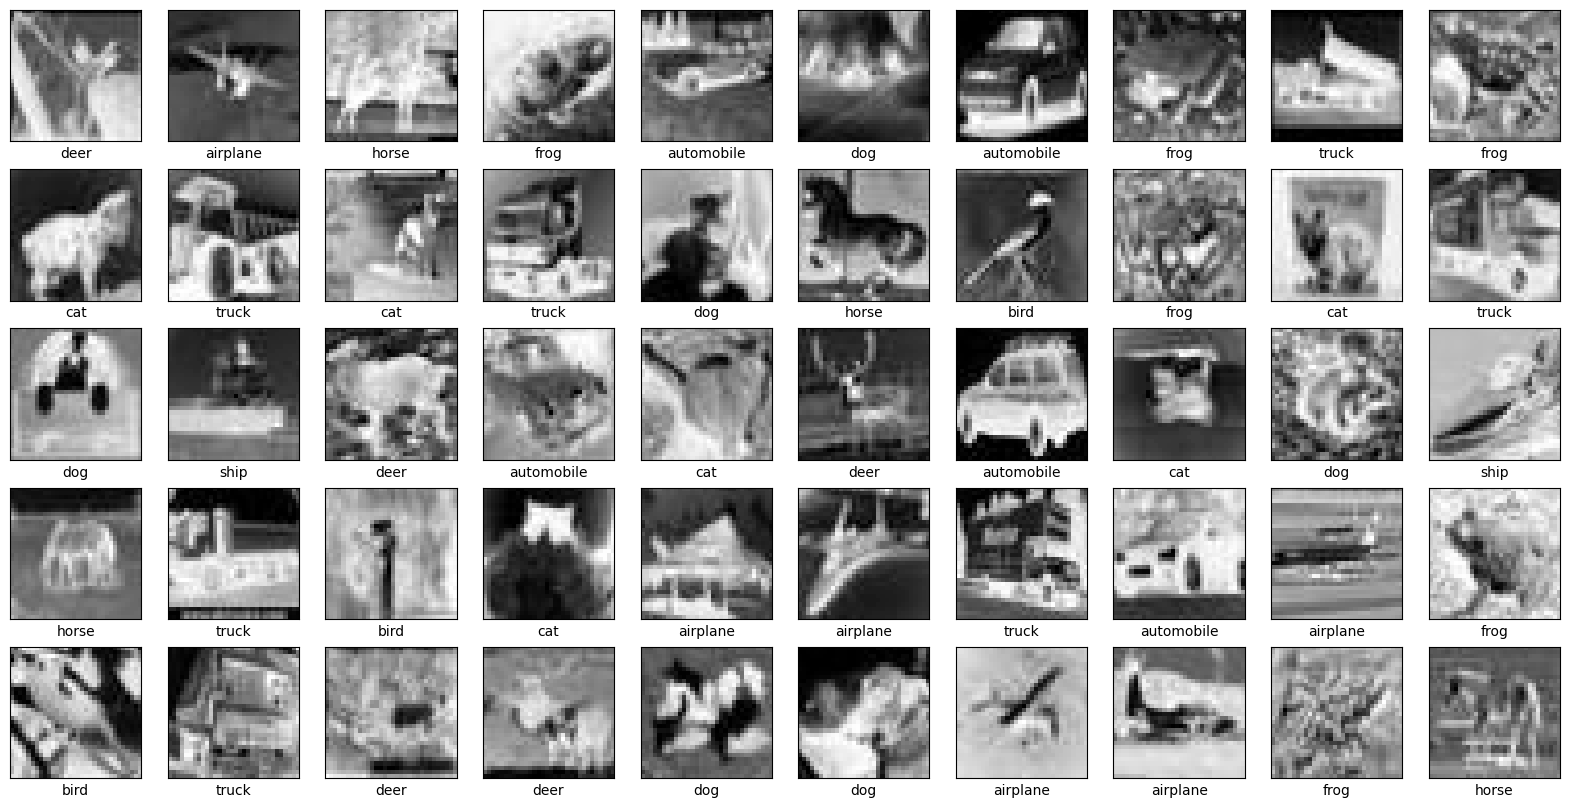

In [7]:
random.shuffle(training_data)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(training_data[i][0], cmap='gray_r')
    plt.xlabel(CATEGORIES[training_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [12]:
f0 = training_data[0:300]
f1 = training_data[300:600]
f2 = training_data[600:900]
f3 = training_data[900:1200]
f4 = training_data[1200:1500]

# Converted the images into 5 folds

In [13]:
folds = [f0, f1, f2, f3, f4]

# 300 images for each class were taken in each class as the processing time is too much

In [35]:

# Define the maximum value of k
k_max = 10

# Define distance functions
def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define a function for k-Nearest Neighbors
def knn(train, validation, k, distance_func):
    predictions = []
    for v in validation:
        distances = [(distance_func(v[0], t[0]), t[1]) for t in train]
        distances.sort(key=lambda x: x[0])
        neighbors = [d[1] for d in distances[:k]]
        counts = np.bincount(neighbors)
        predicted_label = np.argmax(counts)
        predictions.append(predicted_label)
    return predictions

# Lists to store mean and standard deviation of accuracies
mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

# Perform cross-validation for different values of k
for k in tqdm(range(1, k_max + 1)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []

    for i in range(5):
        # Split data into training and validation sets
        train = f1 + f2 + f3 + f4
        validation = [f0, f1, f2, f3, f4][i]

        # Calculate accuracies for both L1 and L2 distances
        accuracy_l1 = sum(1 for v in validation if knn(train, [v], k, l1_dist)[0] == v[1]) / len(validation)
        accuracy_l2 = sum(1 for v in validation if knn(train, [v], k, l2_dist)[0] == v[1]) / len(validation)

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)

    # Calculate mean and standard deviation of accuracies
    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

# Calculate and print average accuracies for L1 and L2 distances
avg_accuracies_l1 = [np.mean(mean_accuracies_l1[k - 1::k_max]) for k in range(1, k_max + 1)]
avg_accuracies_l2 = [np.mean(mean_accuracies_l2[k - 1::k_max]) for k in range(1, k_max + 1)]

print("Average Accuracy for L1 Distance:")
for k, accuracy in enumerate(avg_accuracies_l1, 1):
    print(f"k = {k}: {accuracy:.2f}")

print("\nAverage Accuracy for L2 Distance:")
for k, accuracy in enumerate(avg_accuracies_l2, 1):
    print(f"k = {k}: {accuracy:.2f}")


100%|██████████| 10/10 [06:26<00:00, 38.65s/it]

Average Accuracy for L1 Distance:
k = 1: 0.83
k = 2: 0.59
k = 3: 0.47
k = 4: 0.43
k = 5: 0.40
k = 6: 0.37
k = 7: 0.36
k = 8: 0.35
k = 9: 0.33
k = 10: 0.32

Average Accuracy for L2 Distance:
k = 1: 0.83
k = 2: 0.57
k = 3: 0.42
k = 4: 0.39
k = 5: 0.35
k = 6: 0.33
k = 7: 0.31
k = 8: 0.29
k = 9: 0.28
k = 10: 0.28


# The above shows the comparison result the L1 (Manhattan) and L2 (Eucledean) distances

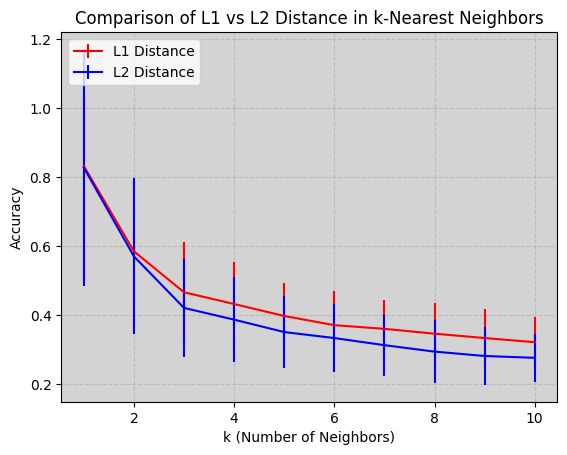

In [36]:
# Add more elements to the plot
plt.errorbar(range(1, k_max + 1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="red")
plt.errorbar(range(1, k_max + 1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="blue")

# Set axis labels
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")

# Set the plot title
plt.title("Comparison of L1 vs L2 Distance in k-Nearest Neighbors")

# Add a legend to the plot
plt.legend()

# Customize the legend position (e.g., upper left)
plt.legend(loc="upper left")

# Set grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the plot background color
plt.gca().set_facecolor('lightgray')

# Display the plot
plt.show()


# The Accuracy of the 2 algorithms

100%|██████████| 1000/1000 [00:00<00:00, 17441.38it/s]


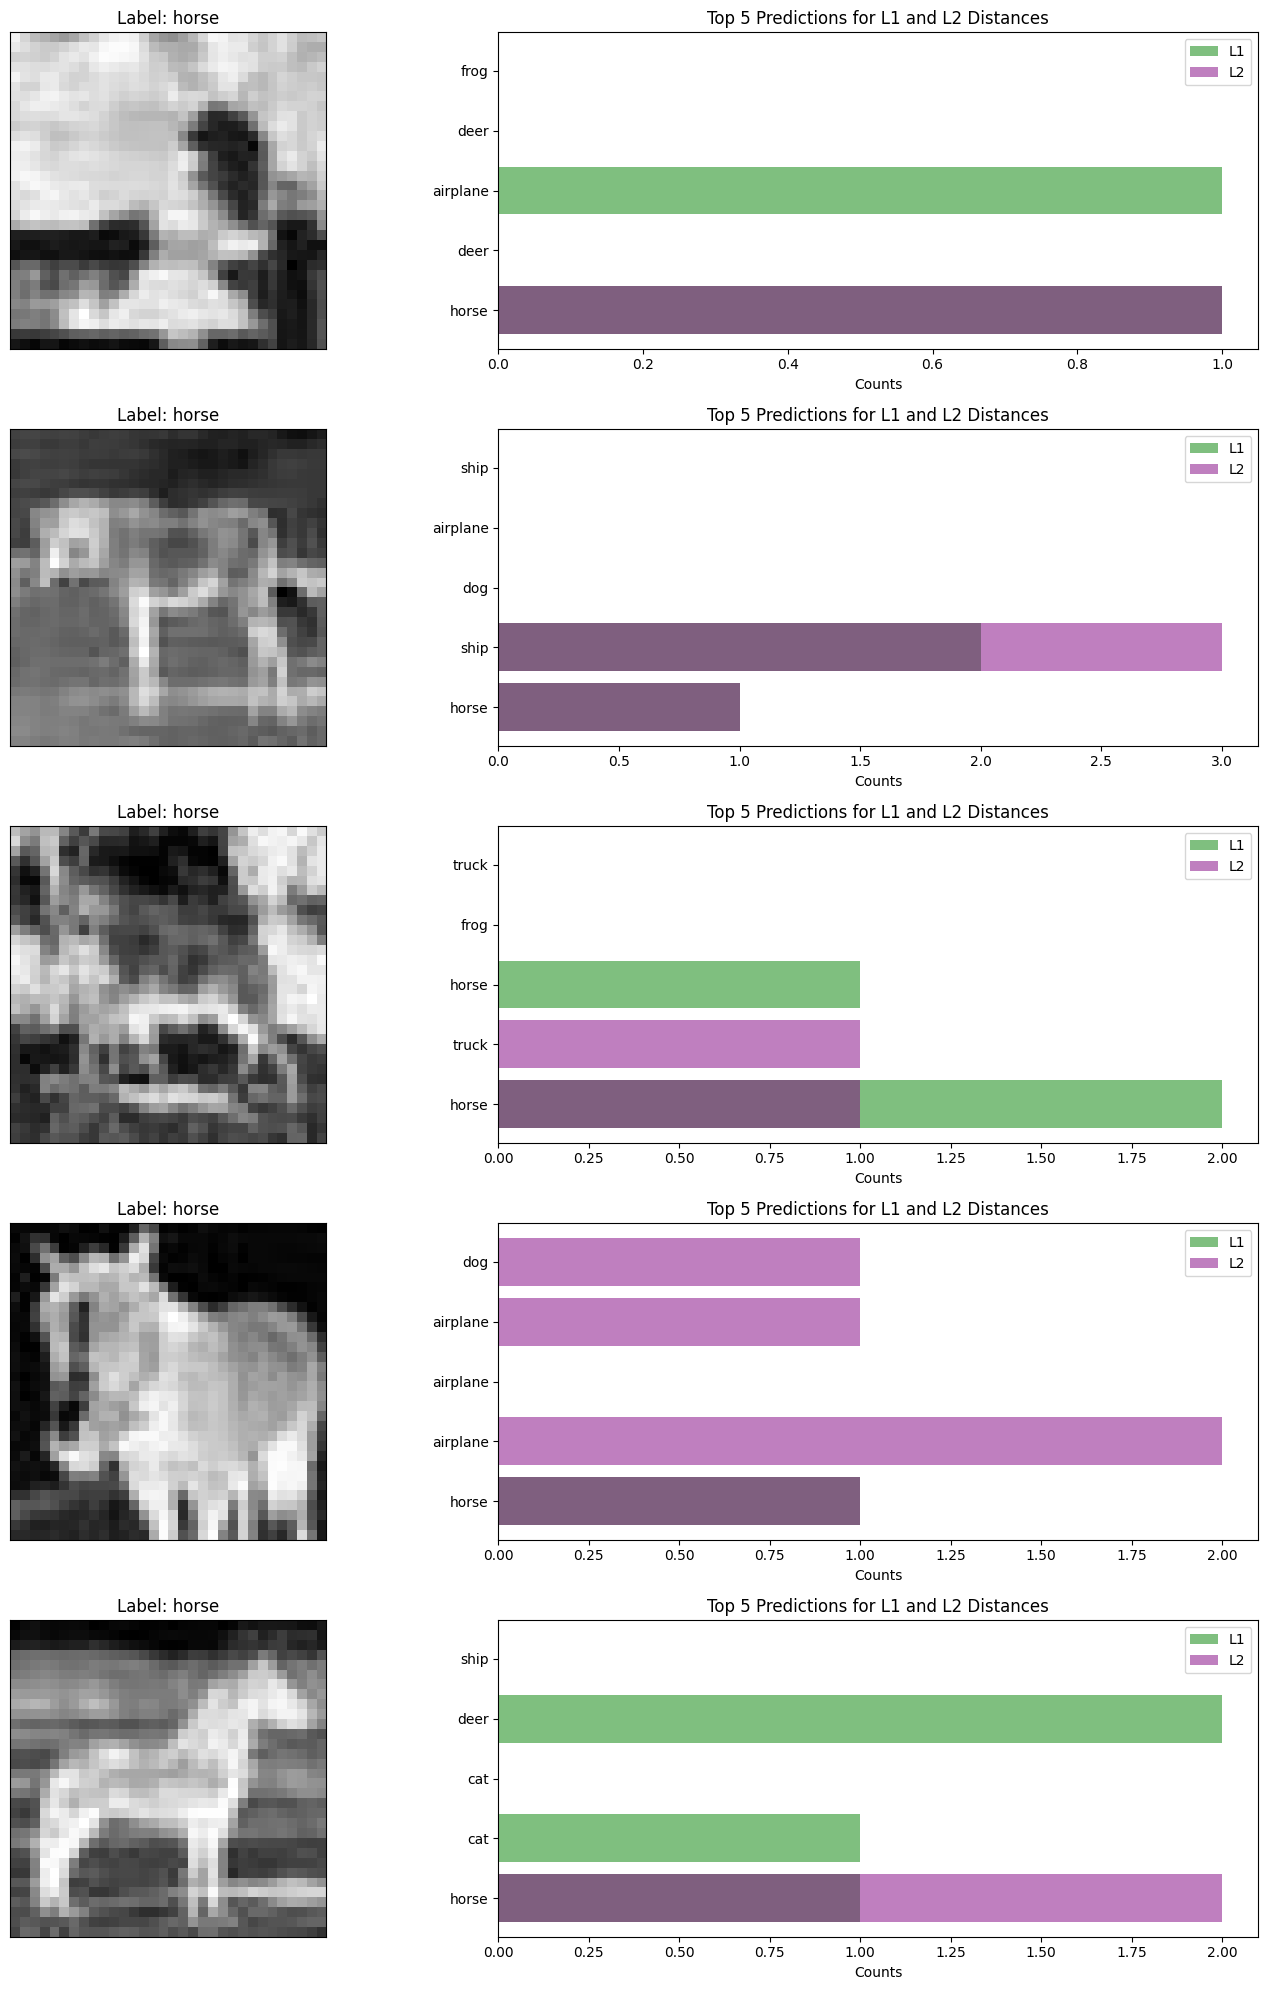

In [37]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            test_data.append([img_gray, class_num])
        except:
            pass

# Function to get the top K predictions for a given test image
def get_top_predictions(test_image, k):
    l1_dists = []
    l2_dists = []
    for t in training_data:
        l1 = l1_dist(test_image, t[0])
        l2 = l2_dist(test_image, t[0])
        l1_dists.append((l1, t[1]))
        l2_dists.append((l2, t[1]))
    l1_dists.sort(key=lambda x: x[0])
    l2_dists.sort(key=lambda x: x[0])

    neighbors_l1 = [d[1] for d in l1_dists[:k]]
    neighbors_l2 = [d[1] for d in l2_dists[:k]]

    return neighbors_l1, neighbors_l2

# Display the top K predictions for a few test images
num_test_images = 5  # Change this to the number of test images you want to display
k_neighbors = 5  # Number of neighbors to consider

plt.figure(figsize=(15, 20))  # Increase the figure size

for i in range(num_test_images):
    test_img, true_label = test_data[i]
    neighbors_l1, neighbors_l2 = get_top_predictions(test_img, k_neighbors)

    # Display the test image
    plt.subplot(num_test_images, 2, 2 * i + 1)
    plt.imshow(test_img, cmap='gray_r')
    plt.title(f"Label: {CATEGORIES[true_label]}")
    plt.xticks([])
    plt.yticks([])

    # Display the top K predictions for both L1 and L2 distances with labels
    plt.subplot(num_test_images, 2, 2 * i + 2)
    labels = [CATEGORIES[label] for label in neighbors_l1]  # Convert labels to category names
    plt.barh(range(k_neighbors), np.bincount(neighbors_l1)[:k_neighbors], color='green', alpha=0.5, label='L1')
    plt.barh(range(k_neighbors), np.bincount(neighbors_l2)[:k_neighbors], color='purple', alpha=0.5, label='L2')
    plt.yticks(range(k_neighbors), labels)  # Set category labels on the y-axis
    plt.xlabel('Counts')
    plt.title(f"Top {k_neighbors} Predictions for L1 and L2 Distances")
    plt.legend()

plt.tight_layout()
plt.show()


# Discussion

The bar graph presents the accuracy outcomes for Manhattan (L1) and Euclidean (L2) distance metrics using a 5-fold cross-validation approach with varying values of k.

Manhattan and Euclidean distances are essential techniques to measure dissimilarity between data points in a vector space. It's crucial to understand the key differences between them. The Manhattan distance is less sensitive to outliers since it computes distances by summing the absolute differences between coordinates. In contrast, the Euclidean distance squares the differences, making it more sensitive to larger discrepancies.

For this analysis, a test dataset was employed from the CIFAR-10 dataset's "test" folder. The dataset comprises 10,000 color images, each with dimensions of 32x32 pixels. For efficiency, the images were converted to grayscale, and approximately 500 images were sampled from each of the 10 subfolders.

Manhattan (L1) Accuracy:
The graph illustrates how accuracy varies as the number of nearest neighbors (k) increases from 1 to 10. The accuracy starts at a high value of 0.83 for k=1, indicating that the model successfully identifies the nearest neighbor. However, as k increases, accuracy gradually declines. At k=2, there's a notable drop to 0.59, followed by further decreases as k continues to rise. The lowest accuracy is achieved at k=10, but it's important to highlight that Manhattan (L1) maintains relatively higher accuracy than other values, with a final accuracy of 0.32 at k=10.

Euclidean (L2) Accuracy:
On the other hand, the Euclidean (L2) accuracy graph displays a slightly different pattern. It initiates with a high accuracy of 0.83 at k=1, mirroring the performance of Manhattan (L1). However, as k increases, the Euclidean accuracy declines more quickly compared to Manhattan. The accuracy drops to 0.57 at k=2 and continues to decrease as k increases. Interestingly, there's a significant peak at approximately k=4.5, where accuracy momentarily rises before decreasing again. The lowest accuracy point is at k=10, similar to Manhattan (L1), with a final accuracy of 0.28.

This analysis highlights the varying behaviors of Manhattan (L1) and Euclidean (L2) distances within the K-nearest neighbors (KNN) algorithm. It underscores the sensitivity of these metrics to different values of k and how they affect accuracy differently. Additionally, it's essential to acknowledge the trade-off between the number of neighbors considered (k) and the resulting accuracy in the KNN algorithm. The choice of the appropriate distance metric and k value plays a crucial role in achieving optimal model performance in real-world applications.